# Lab 07

In [61]:
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
import time

## Part 1

(764, 1145, 3)


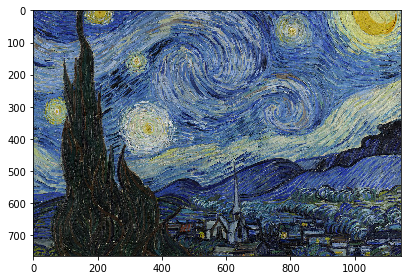

In [62]:
# Load image here. Display the image and the image shape.
starry = io.imread('starry.jpg')
io.imshow(starry)
print(starry.shape)
plt.show()

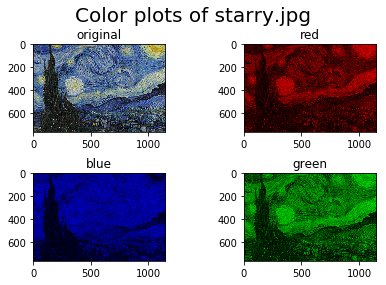

In [85]:
# Make the color arrays and display them on a labelled subplot.
nrows, ncols, channals = starry_red.shape

#using list comprehension
#starry_red = np.array([elem * [1, 0, 0] for elem in starry])
#starry_blue = np.array([elem * [0, 1, 0] for elem in starry])
#starry_green = np.array([elem * [0, 0, 1] for elem in starry])

starry_red = np.copy(starry)
starry_red[:,:,[1,2]] = 0
starry_blue = np.copy(starry)
starry_blue[:,:,[0,1]] = 0
starry_green = np.copy(starry)
starry_green[:,:,[0,2]] = 0

f, ((sp0, sp1),(sp2, sp3)) = plt.subplots(2, 2)
sp0.imshow(starry)
sp0.set_title('original')
sp1.imshow(starry_red)
sp1.set_title('red')
sp2.imshow(starry_blue)
sp2.set_title('blue')
sp3.imshow(starry_green)
sp3.set_title('green')

plt.tight_layout()
plt.suptitle('Color plots of starry.jpg', fontsize=20) 
plt.subplots_adjust(top=0.85)
plt.show()

## Part 2

In [76]:
from math import sqrt
from skimage.feature import blob_log, blob_doh
from skimage.color import rgb2gray

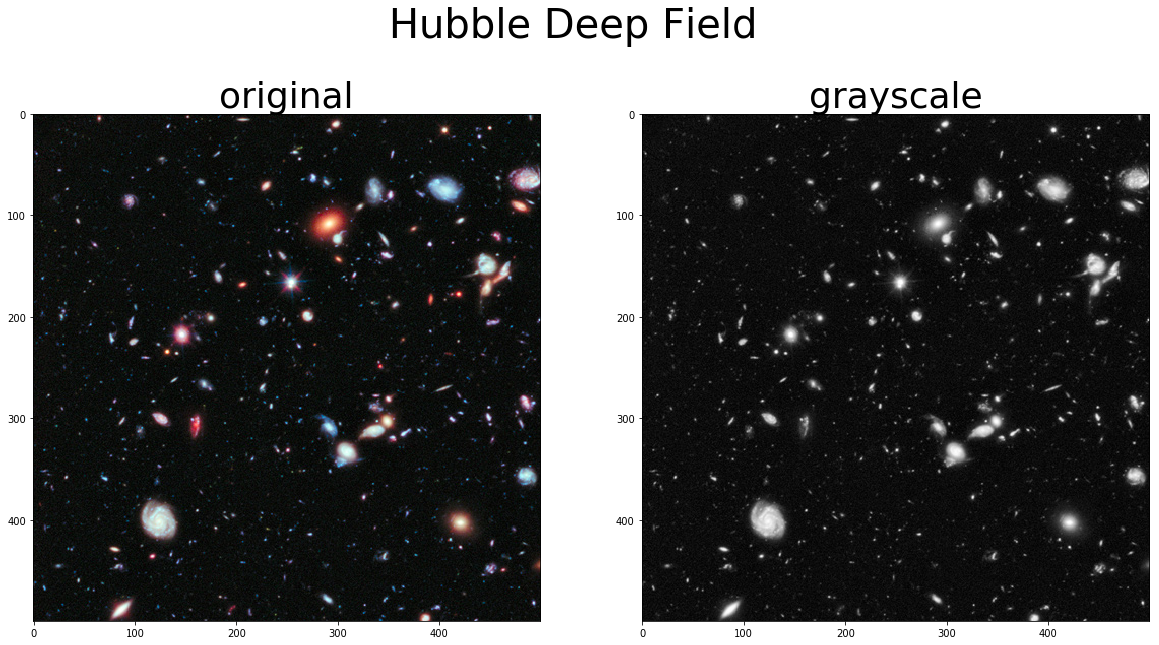

In [130]:
# Here is the image of the Hubble Deep Field. 
image = data.hubble_deep_field()[0:500, 0:500]

#Convert the image to grayscale and display next to the original.
img_gray = rgb2gray(image)
f, (sp0, sp1) = plt.subplots(1, 2, figsize =(20,12))
sp0.imshow(image)
sp0.set_title('original', fontsize = 36)
sp1.imshow(img_gray, cmap='gray')
sp1.set_title('grayscale', fontsize = 36)

#plt.tight_layout()
plt.suptitle('Hubble Deep Field', fontsize=40) 
plt.subplots_adjust(top=1)
plt.show()

In [153]:
# Apply the two Blob detection methods and measure the time taken by the algorithms.
from skimage.util import invert
%time log = blob_log(img_gray, min_sigma=3.0, threshold = 0.3)
%time doh = blob_doh(img_gray, min_sigma=6.0)

CPU times: user 2.86 s, sys: 39.2 ms, total: 2.9 s
Wall time: 1.57 s
CPU times: user 205 ms, sys: 6.64 ms, total: 211 ms
Wall time: 167 ms


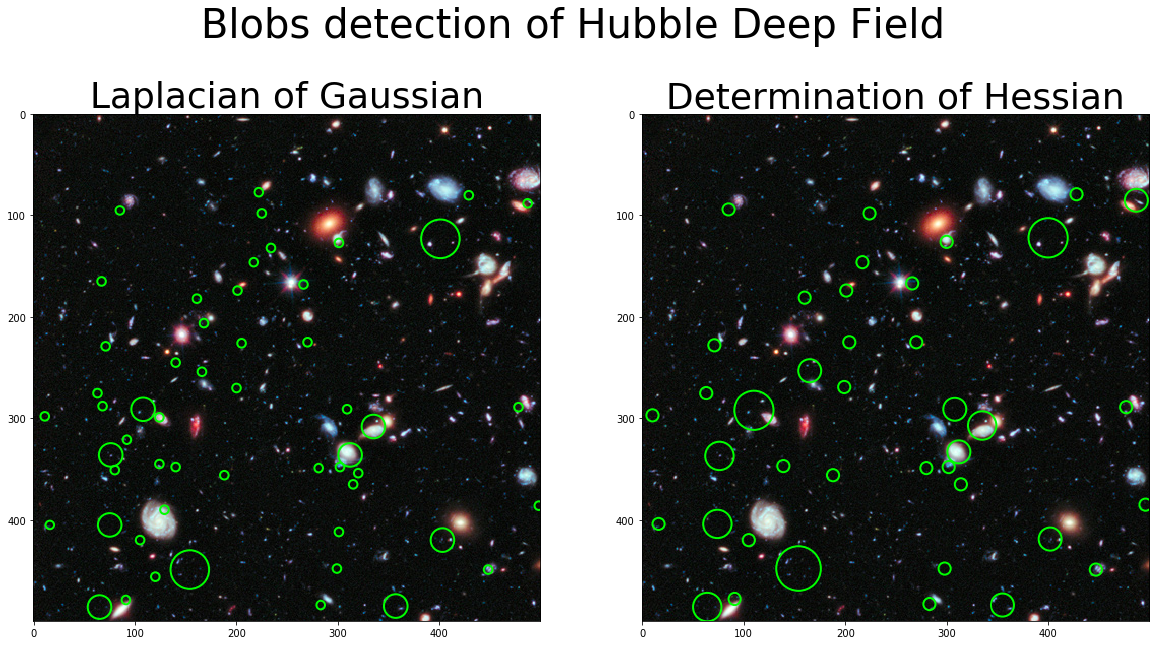

In [154]:
# Plot the 2 methods side-by-side along with circle patches. 
f, (sp0, sp1) = plt.subplots(1, 2, figsize=(20, 12))
sp0.imshow(image)
sp0.set_title('Laplacian of Gaussian', fontsize = 36)
sp1.imshow(image)
sp1.set_title('Determination of Hessian', fontsize = 36)
for elem in log:
    sp0.add_patch(plt.Circle((elem[0], elem[1]), np.sqrt(2) * elem[2], fill=False, edgecolor='lime', linewidth=2))
    
for elem in doh:
    sp1.add_patch(plt.Circle((elem[0], elem[1]), elem[2], fill=False, edgecolor='lime', linewidth=2))
    
#plt.tight_layout()
plt.suptitle('Blobs detection of Hubble Deep Field', fontsize=40) 
plt.subplots_adjust(top=1)
plt.show()